# Our objective is to predict the level of damage grade to buildings caused by the 2015 Gorkha earthquake in Nepal with the highest possible accuracy using Machine Learning Models.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Data Preparation

In [2]:
trainData = pd.read_csv('train_values.csv')
trainData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
testData = pd.read_csv('test_values.csv')
testData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
damageData = pd.read_csv('train_labels.csv')
damageData.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
trainData = trainData.merge(damageData, on = 'building_id')
trainData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


## Check the size of the data

In [7]:
print("Train Dataset size: ",trainData.shape)
print("Damage Dataset size: ",damageData.shape)
print("Test Dataset size: ",testData.shape)

Train Dataset size:  (260601, 40)
Damage Dataset size:  (260601, 2)
Test Dataset size:  (86868, 39)


## Data Cleaning

### In order to perform Machine Learning based on these categorical data, we will need to convert the data into numeric form by using label encoding before applying learning algorithm on them

In [8]:
# Categorical Columns
cat_columns = ['land_surface_condition', 'foundation_type', 'roof_type',
                           'ground_floor_type', 'other_floor_type', 'position',
                           'plan_configuration', 'legal_ownership_status']

# label encoding the categorical columns in train dataset 
for i in cat_columns:
    trainData[i]=trainData[i].astype("category") # convert to category data type
    trainData[i]=trainData[i].cat.codes          #.cat.codes is to label encoding
trainData.head()

# label encoding the categorical columns in test dataset 
for i in cat_columns:
    testData[i]=testData[i].astype("category")
    testData[i]=testData[i].cat.codes
testData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,2,2,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,2,2,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,2,2,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,2,2,...,0,0,0,0,0,0,0,0,0,0


## Check for any Null Values

In [9]:
print('Train Dataset has {} null values'.format(sum(trainData.isnull().any())))
print('Test Dataset has {} null values'.format(sum(testData.isnull().any())))
print('Train Damage Dataset has {} null values'.format(sum(damageData.isnull().any())))

Train Dataset has 0 null values
Test Dataset has 0 null values
Train Damage Dataset has 0 null values


## Find out which damage grade is the highest

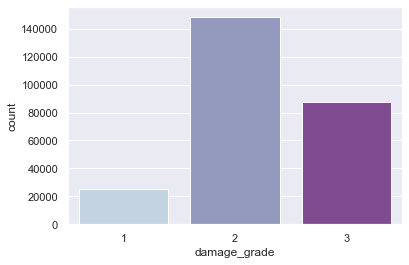

In [10]:
sb.countplot(damageData["damage_grade"], palette = "BuPu")

## Correlation with Damage Grade

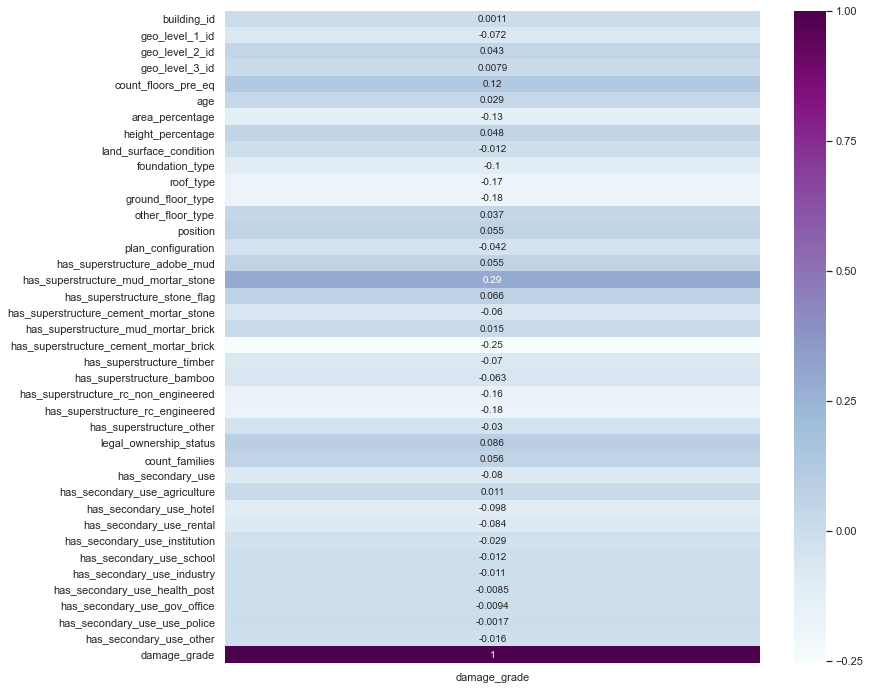

In [11]:
plt.figure(figsize=(12,12))
cor=pd.DataFrame(trainData.corr()["damage_grade"])
sb.heatmap(cor,annot=True, cmap = "BuPu")

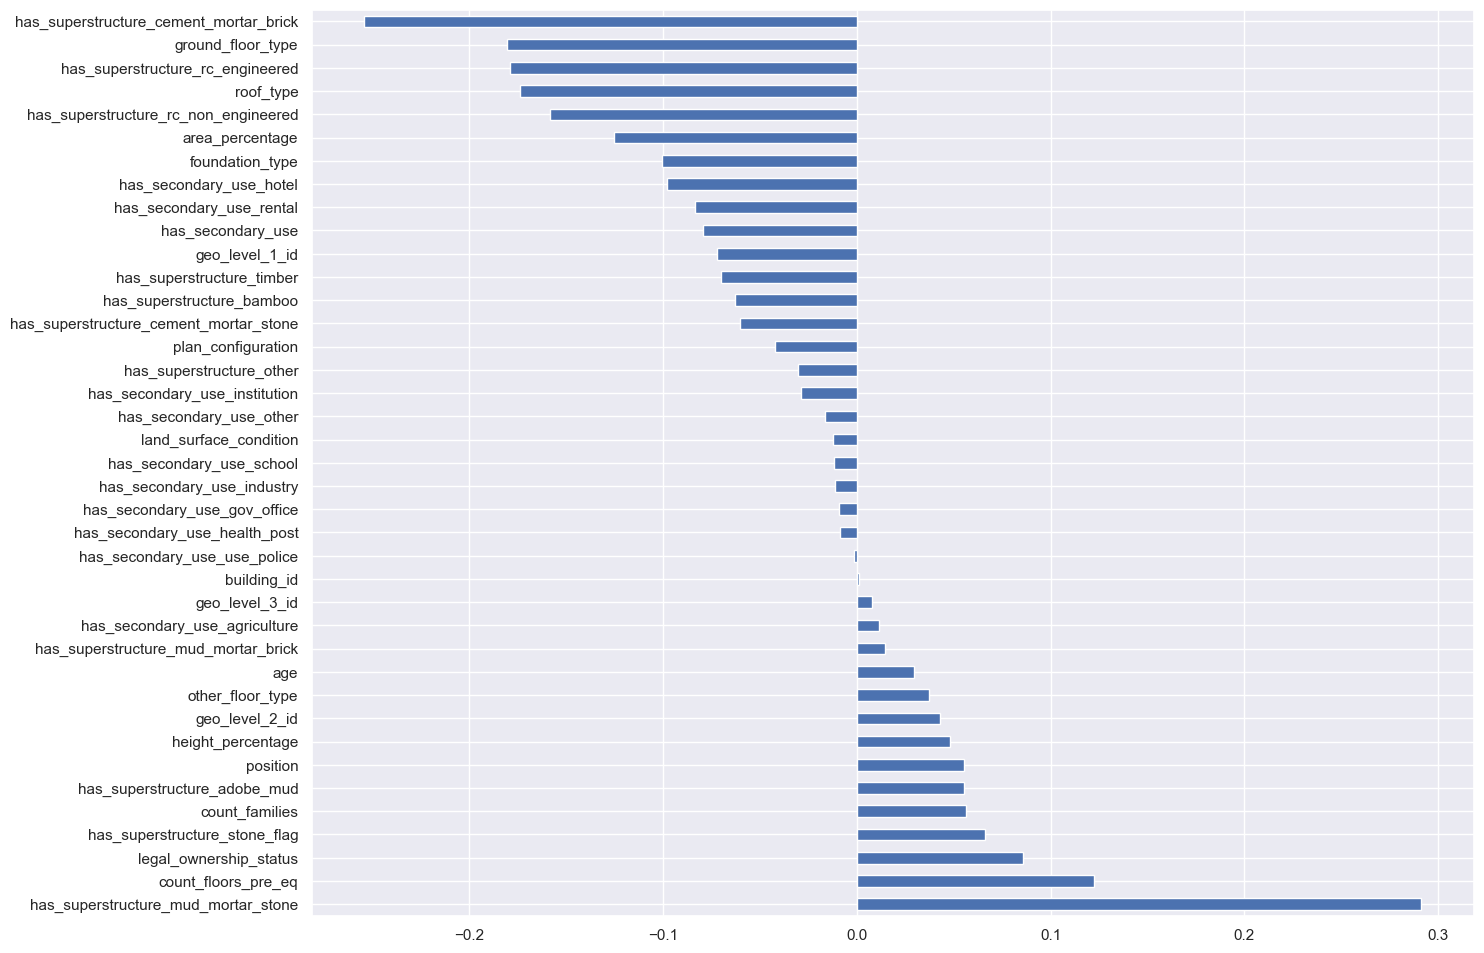

In [12]:
plt.figure(figsize=(15,12), dpi=100)
cor.damage_grade.drop('damage_grade').sort_values(ascending=False).plot.barh()

### Observation: From here, we can see that has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_brick, ground_floor_type, has_superstructure_rc_engineered and roof_type 

## Statistical Visualization

## If have big difference between the ratio of the damage grade, the correlation relationship is high.

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

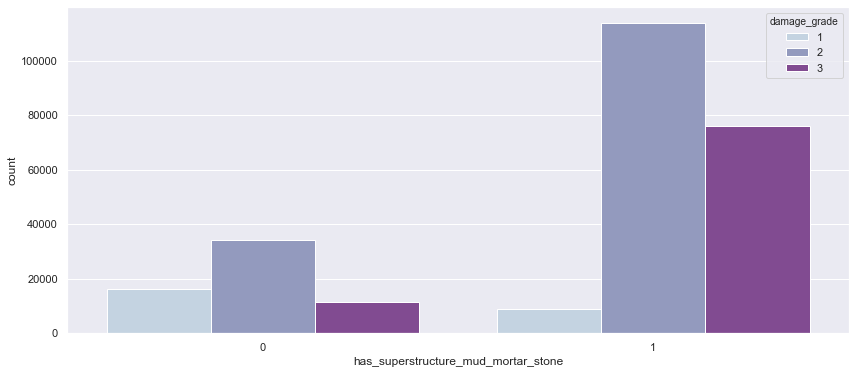

In [13]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='has_superstructure_mud_mortar_stone',hue='damage_grade', palette = "BuPu")
trainData['has_superstructure_mud_mortar_stone'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

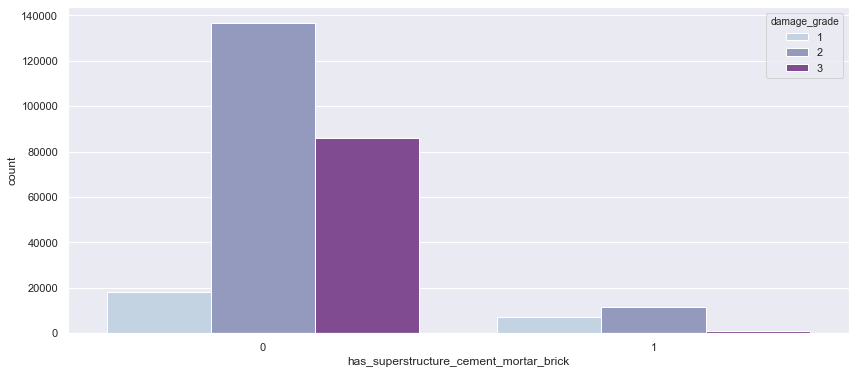

In [14]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='has_superstructure_cement_mortar_brick',hue='damage_grade', palette = "BuPu")
trainData['has_superstructure_cement_mortar_brick'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

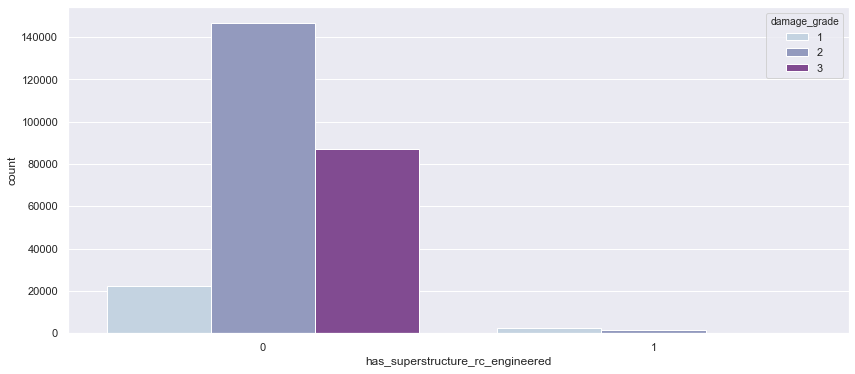

In [15]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='has_superstructure_rc_engineered',hue='damage_grade', palette = "BuPu")
trainData['has_superstructure_rc_engineered'].value_counts()

0    209619
3     24877
2     24593
4      1004
1       508
Name: ground_floor_type, dtype: int64

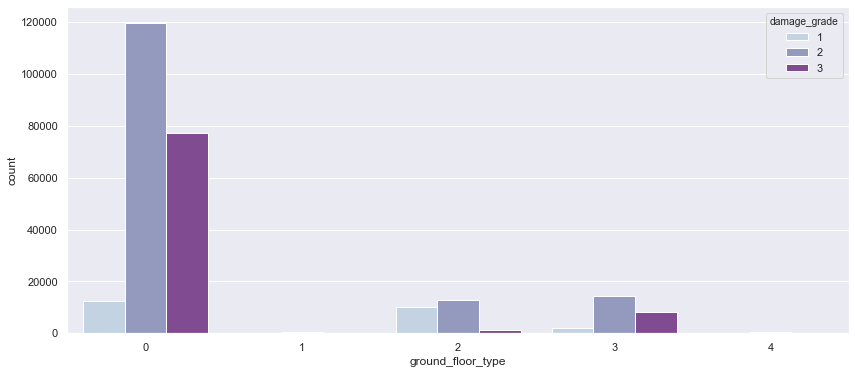

In [16]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='ground_floor_type',hue='damage_grade', palette = "BuPu")
trainData['ground_floor_type'].value_counts()

0    182842
1     61576
2     16183
Name: roof_type, dtype: int64

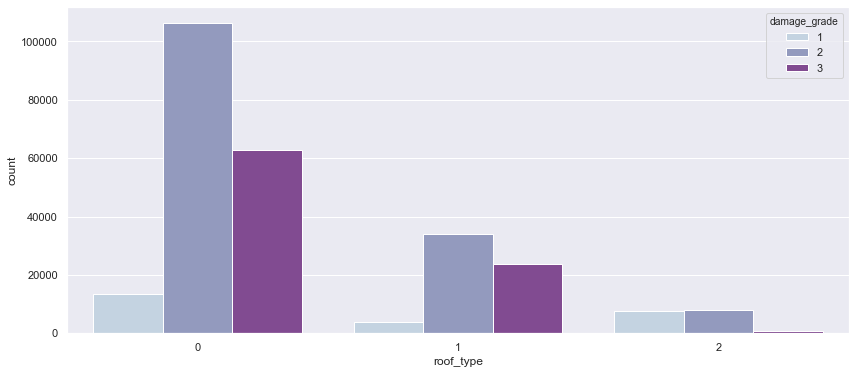

In [17]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='roof_type',hue='damage_grade', palette = "BuPu")
trainData['roof_type'].value_counts()

# Waffle Chart

In [18]:
from pywaffle import Waffle

#separate the different grades into diff dataframe
grade_df = trainData.copy()

grade_1_df = grade_df.loc[grade_df['damage_grade'] == 1]
grade_2_df = grade_df.loc[grade_df['damage_grade'] == 2]
grade_3_df = grade_df.loc[grade_df['damage_grade'] == 3]

grade 1 has_superstructure_mud_mortar_stone (“1” : “0”) : (8760:16364)
grade 2 has_superstructure_mud_mortar_stone (“1” : “0”) : (113947:34312)
grade 3 has_superstructure_mud_mortar_stone (“1” : “0”) : (75854:11364)


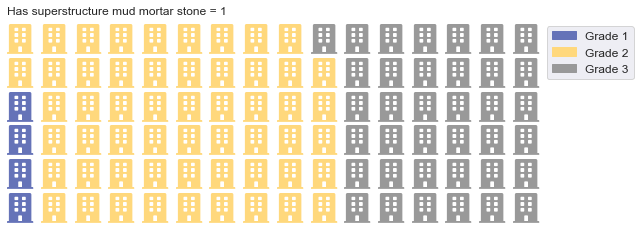

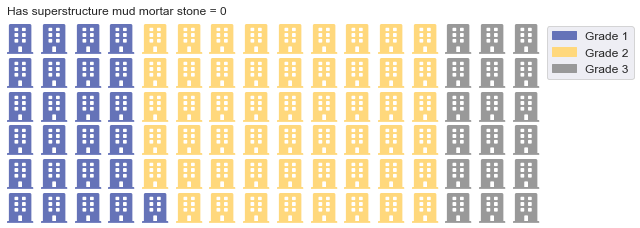

In [19]:
##-------------has_superstructure_mud_mortar_stone------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_mud_mortar_stone_1 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_stone'] == 1].index)
grade1_mud_mortar_stone_0 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_stone'] == 0].index)
print("grade 1 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade1_mud_mortar_stone_1)+":"+str(grade1_mud_mortar_stone_0)+")")

grade2_mud_mortar_stone_1 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_stone'] == 1].index)
grade2_mud_mortar_stone_0 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_stone'] == 0].index)
print("grade 2 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade2_mud_mortar_stone_1)+":"+str(grade2_mud_mortar_stone_0)+")")

grade3_mud_mortar_stone_1 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_stone'] == 1].index)
grade3_mud_mortar_stone_0 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_stone'] == 0].index)
print("grade 3 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade3_mud_mortar_stone_1)+":"+str(grade3_mud_mortar_stone_0)+")")


data_of_1 = {'Grade 1': grade1_mud_mortar_stone_1, 'Grade 2': grade2_mud_mortar_stone_1, 'Grade 3': grade3_mud_mortar_stone_1}
data_of_0 = {'Grade 1': grade1_mud_mortar_stone_0, 'Grade 2': grade2_mud_mortar_stone_0, 'Grade 3': grade3_mud_mortar_stone_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'Has superstructure mud mortar stone = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'Has superstructure mud mortar stone = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()

## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

grade 1 has_superstructure_cement_mortar_brick (“1” : “0”) : (7105:18019)
grade 2 has_superstructure_cement_mortar_brick (“1” : “0”) : (11421:136838)
grade 3 has_superstructure_cement_mortar_brick (“1” : “0”) : (1089:86129)


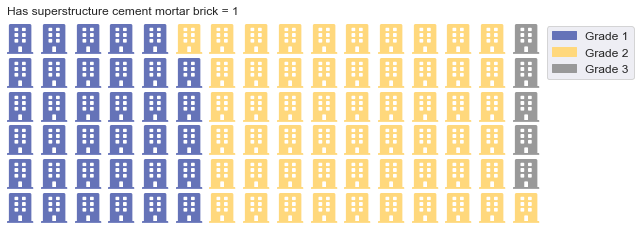

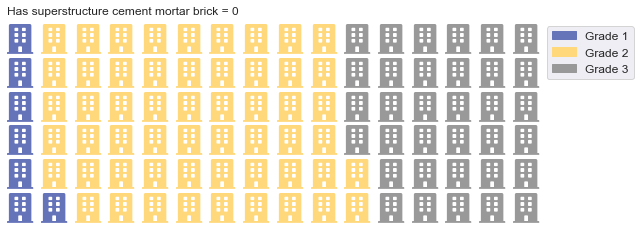

In [20]:
##-------------has_superstructure_cement_mortar_brick------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_cement_mortar_brick_1 = len(grade_1_df[grade_1_df['has_superstructure_cement_mortar_brick'] == 1].index)
grade1_cement_mortar_brick_0 = len(grade_1_df[grade_1_df['has_superstructure_cement_mortar_brick'] == 0].index)
print("grade 1 has_superstructure_cement_mortar_brick (“1” : “0”) : ("+str(grade1_cement_mortar_brick_1)+":"+str(grade1_cement_mortar_brick_0)+")")

grade2_cement_mortar_brick_1 = len(grade_2_df[grade_2_df['has_superstructure_cement_mortar_brick'] == 1].index)
grade2_cement_mortar_brick_0 = len(grade_2_df[grade_2_df['has_superstructure_cement_mortar_brick'] == 0].index)
print("grade 2 has_superstructure_cement_mortar_brick (“1” : “0”) : ("+str(grade2_cement_mortar_brick_1)+":"+str(grade2_cement_mortar_brick_0)+")")

grade3_cement_mortar_brick_1 = len(grade_3_df[grade_3_df['has_superstructure_cement_mortar_brick'] == 1].index)
grade3_cement_mortar_brick_0 = len(grade_3_df[grade_3_df['has_superstructure_cement_mortar_brick'] == 0].index)
print("grade 3 has_superstructure_cement_mortar_brick (“1” : “0”) : ("+str(grade3_cement_mortar_brick_1)+":"+str(grade3_cement_mortar_brick_0)+")")


data_of_1 = {'Grade 1': grade1_cement_mortar_brick_1, 'Grade 2': grade2_cement_mortar_brick_1, 'Grade 3': grade3_cement_mortar_brick_1}
data_of_0 = {'Grade 1': grade1_cement_mortar_brick_0, 'Grade 2': grade2_cement_mortar_brick_0, 'Grade 3': grade3_cement_mortar_brick_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'Has superstructure cement mortar brick = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'Has superstructure cement mortar brick = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()

## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

grade 1 has_superstructure_rc_engineered (“1” : “0”) : (2656:22468)
grade 2 has_superstructure_rc_engineered (“1” : “0”) : (1402:146857)
grade 3 has_superstructure_rc_engineered (“1” : “0”) : (75:87143)


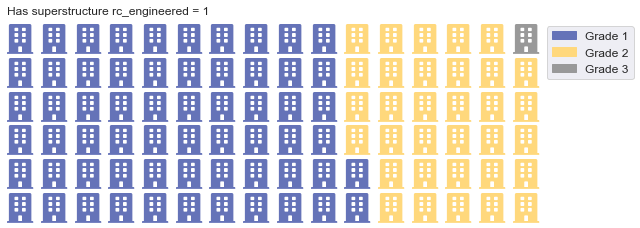

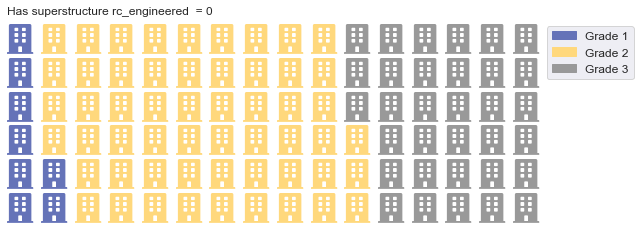

In [21]:
##-------------has_superstructure_rc_engineered------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_rc_engineered_1 = len(grade_1_df[grade_1_df['has_superstructure_rc_engineered'] == 1].index)
grade1_rc_engineered_0 = len(grade_1_df[grade_1_df['has_superstructure_rc_engineered'] == 0].index)
print("grade 1 has_superstructure_rc_engineered (“1” : “0”) : ("+str(grade1_rc_engineered_1)+":"+str(grade1_rc_engineered_0)+")")

grade2_rc_engineered_1 = len(grade_2_df[grade_2_df['has_superstructure_rc_engineered'] == 1].index)
grade2_rc_engineered_0 = len(grade_2_df[grade_2_df['has_superstructure_rc_engineered'] == 0].index)
print("grade 2 has_superstructure_rc_engineered (“1” : “0”) : ("+str(grade2_rc_engineered_1)+":"+str(grade2_rc_engineered_0)+")")

grade3_rc_engineered_1 = len(grade_3_df[grade_3_df['has_superstructure_rc_engineered'] == 1].index)
grade3_rc_engineered_0 = len(grade_3_df[grade_3_df['has_superstructure_rc_engineered'] == 0].index)
print("grade 3 has_superstructure_rc_engineered (“1” : “0”) : ("+str(grade3_rc_engineered_1)+":"+str(grade3_rc_engineered_0)+")")


data_of_1 = {'Grade 1': grade1_rc_engineered_1, 'Grade 2': grade2_rc_engineered_1, 'Grade 3': grade3_rc_engineered_1}
data_of_0 = {'Grade 1': grade1_rc_engineered_0, 'Grade 2': grade2_rc_engineered_0, 'Grade 3': grade3_rc_engineered_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'Has superstructure rc_engineered = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'Has superstructure rc_engineered  = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()


## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

In [22]:
grade_1_df['roof_type'].unique()

array([1, 0, 2], dtype=int64)

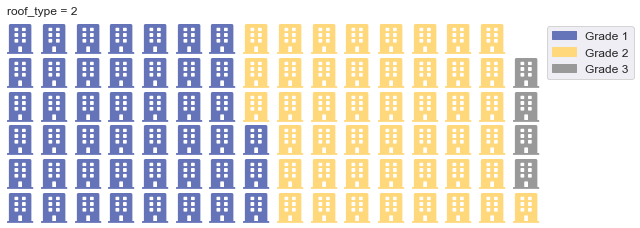

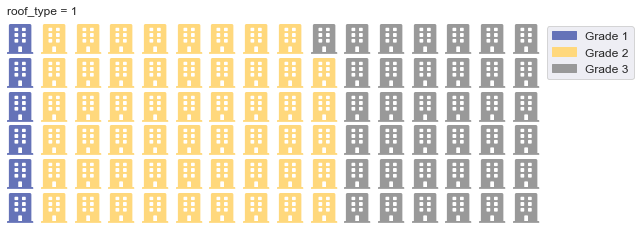

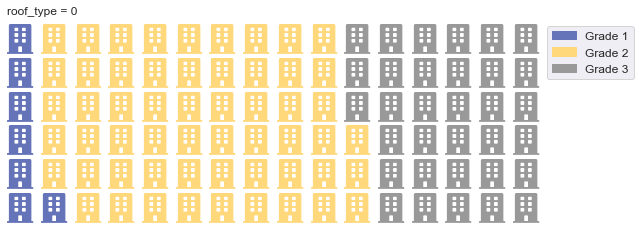

In [23]:
##-------------roof_type------------

#get count of 2, 1 and 0 for different column variable base on different grade dataframe
grade1_roof_type_2 = len(grade_1_df[grade_1_df['roof_type'] == 2].index)
grade1_roof_type_1 = len(grade_1_df[grade_1_df['roof_type'] == 1].index)
grade1_roof_type_0 = len(grade_1_df[grade_1_df['roof_type'] == 0].index)

grade2_roof_type_2 = len(grade_2_df[grade_2_df['roof_type'] == 2].index)
grade2_roof_type_1 = len(grade_2_df[grade_2_df['roof_type'] == 1].index)
grade2_roof_type_0 = len(grade_2_df[grade_2_df['roof_type'] == 0].index)

grade3_roof_type_2 = len(grade_3_df[grade_3_df['roof_type'] == 2].index)
grade3_roof_type_1 = len(grade_3_df[grade_3_df['roof_type'] == 1].index)
grade3_roof_type_0 = len(grade_3_df[grade_3_df['roof_type'] == 0].index)

data_of_2 = {'Grade 1': grade1_roof_type_2, 'Grade 2': grade2_roof_type_2, 'Grade 3': grade3_roof_type_2}
data_of_1 = {'Grade 1': grade1_roof_type_1, 'Grade 2': grade2_roof_type_1, 'Grade 3': grade3_roof_type_1}
data_of_0 = {'Grade 1': grade1_roof_type_0, 'Grade 2': grade2_roof_type_0, 'Grade 3': grade3_roof_type_0}

#figure for column with value 2 for grade 1,2,3
fig_2 = plt.figure(
    title = {'label': 'roof_type = 2 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_2,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'roof_type = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'roof_type = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_2.gca().set_facecolor('#FFFFFF')
fig_2.set_facecolor('#FFFFFF')
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()


## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

In [24]:
grade_1_df['ground_floor_type'].unique()

array([2, 0, 4, 3, 1], dtype=int64)

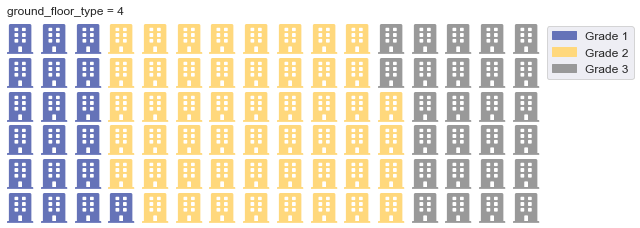

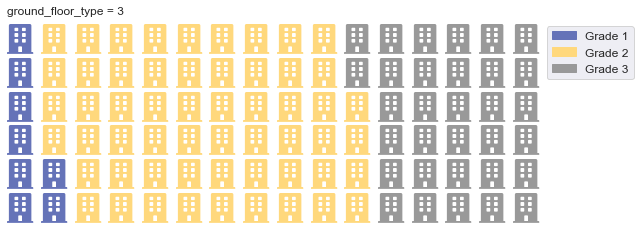

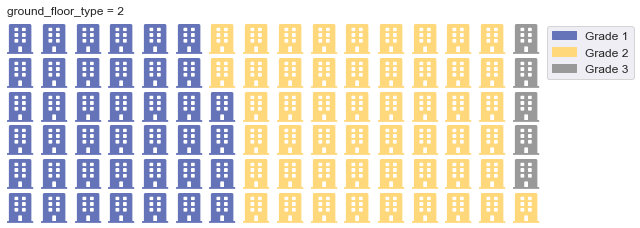

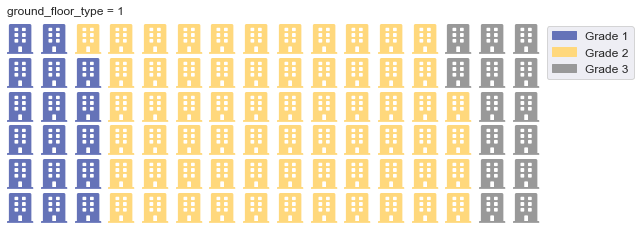

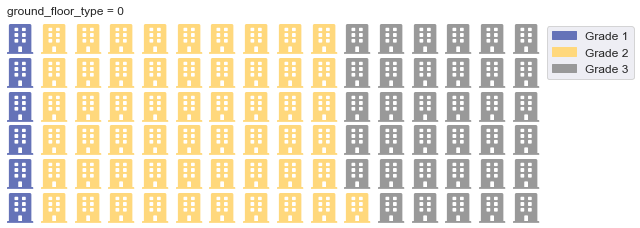

In [25]:
##-------------ground_floor_type------------

#get count of 4,3 2, 1 and 0 for different column variable base on different grade dataframe
grade1_ground_floor_type_4 = len(grade_1_df[grade_1_df['ground_floor_type'] == 4].index)
grade1_ground_floor_type_3 = len(grade_1_df[grade_1_df['ground_floor_type'] == 3].index)
grade1_ground_floor_type_2 = len(grade_1_df[grade_1_df['ground_floor_type'] == 2].index)
grade1_ground_floor_type_1 = len(grade_1_df[grade_1_df['ground_floor_type'] == 1].index)
grade1_ground_floor_type_0 = len(grade_1_df[grade_1_df['ground_floor_type'] == 0].index)


grade2_ground_floor_type_4 = len(grade_2_df[grade_2_df['ground_floor_type'] == 4].index)
grade2_ground_floor_type_3 = len(grade_2_df[grade_2_df['ground_floor_type'] == 3].index)
grade2_ground_floor_type_2 = len(grade_2_df[grade_2_df['ground_floor_type'] == 2].index)
grade2_ground_floor_type_1 = len(grade_2_df[grade_2_df['ground_floor_type'] == 1].index)
grade2_ground_floor_type_0 = len(grade_2_df[grade_2_df['ground_floor_type'] == 0].index)

grade3_ground_floor_type_4 = len(grade_3_df[grade_3_df['ground_floor_type'] == 4].index)
grade3_ground_floor_type_3 = len(grade_3_df[grade_3_df['ground_floor_type'] == 3].index)
grade3_ground_floor_type_2 = len(grade_3_df[grade_3_df['ground_floor_type'] == 2].index)
grade3_ground_floor_type_1 = len(grade_3_df[grade_3_df['ground_floor_type'] == 1].index)
grade3_ground_floor_type_0 = len(grade_3_df[grade_3_df['ground_floor_type'] == 0].index)

data_of_4 = {'Grade 1': grade1_ground_floor_type_4, 'Grade 2': grade2_ground_floor_type_4, 'Grade 3': grade3_ground_floor_type_4}
data_of_3 = {'Grade 1': grade1_ground_floor_type_3, 'Grade 2': grade2_ground_floor_type_3, 'Grade 3': grade3_ground_floor_type_3}
data_of_2 = {'Grade 1': grade1_ground_floor_type_2, 'Grade 2': grade2_ground_floor_type_2, 'Grade 3': grade3_ground_floor_type_2}
data_of_1 = {'Grade 1': grade1_ground_floor_type_1, 'Grade 2': grade2_ground_floor_type_1, 'Grade 3': grade3_ground_floor_type_1}
data_of_0 = {'Grade 1': grade1_ground_floor_type_0, 'Grade 2': grade2_ground_floor_type_0, 'Grade 3': grade3_ground_floor_type_0}

#figure for column with value 4 for grade 1,2,3
fig_4 = plt.figure(
    title = {'label': 'ground_floor_type = 4 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_4,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 3 for grade 1,2,3
fig_3 = plt.figure(
    title = {'label': 'ground_floor_type = 3 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_3,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 2 for grade 1,2,3
fig_2 = plt.figure(
    title = {'label': 'ground_floor_type = 2 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_2,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'ground_floor_type = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'ground_floor_type = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

fig_4.gca().set_facecolor('#FFFFFF')
fig_4.set_facecolor('#FFFFFF')

fig_3.gca().set_facecolor('#FFFFFF')
fig_3.set_facecolor('#FFFFFF')

fig_2.gca().set_facecolor('#FFFFFF')
fig_2.set_facecolor('#FFFFFF')

fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')

fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()


## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

## Example of a weak relation -has_superstructure_mud_mortar_brick

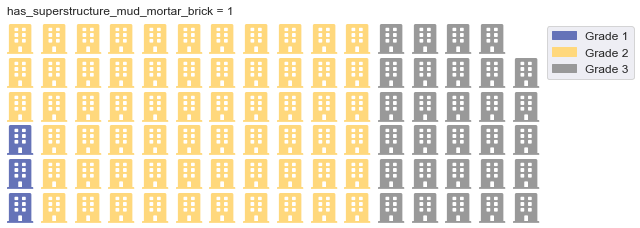

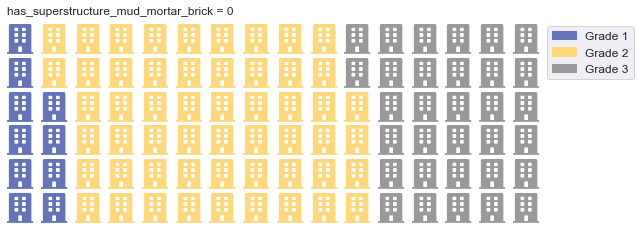

In [26]:
##-------------has_superstructure_mud_mortar_brick------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_mud_mortar_brick_1 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_brick'] == 1].index)
grade1_mud_mortar_brick_0 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_brick'] == 0].index)
#print("grade 1 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade1_mud_mortar_stone_1)+":"+str(grade1_mud_mortar_stone_0)+")")

grade2_mud_mortar_brick_1 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_brick'] == 1].index)
grade2_mud_mortar_brick_0 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_brick'] == 0].index)
#print("grade 2 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade2_mud_mortar_stone_1)+":"+str(grade2_mud_mortar_stone_0)+")")

grade3_mud_mortar_brick_1 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_brick'] == 1].index)
grade3_mud_mortar_brick_0 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_brick'] == 0].index)
#print("grade 3 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade3_mud_mortar_stone_1)+":"+str(grade3_mud_mortar_stone_0)+")")


data_of_1 = {'Grade 1': grade1_mud_mortar_brick_1, 'Grade 2': grade2_mud_mortar_brick_1, 'Grade 3': grade3_mud_mortar_brick_1}
data_of_0 = {'Grade 1': grade1_mud_mortar_brick_0, 'Grade 2': grade2_mud_mortar_brick_0, 'Grade 3': grade3_mud_mortar_brick_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'has_superstructure_mud_mortar_brick = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'has_superstructure_mud_mortar_brick = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()

## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means weak correlation

## Drop unnecessary columns

In [18]:
damageData.drop(['building_id'], axis=1, inplace=True)
trainData.drop(['building_id', 'damage_grade'], axis=1, inplace=True)
testData.drop(['building_id'], axis=1, inplace=True)

## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = damageData
x = trainData 

#Split the dataset randomly into 80% for train dataset and 20% for test dataset
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Confusion Matrix and Classification Accuracy of Decision Tree Model

Goodness of Fit of Decision Tree Model
Classification Accuracy for Train Dataset 	: 0.6588353798925557
Classification Accuracy for Test Dataset 	: 0.6602712918017689



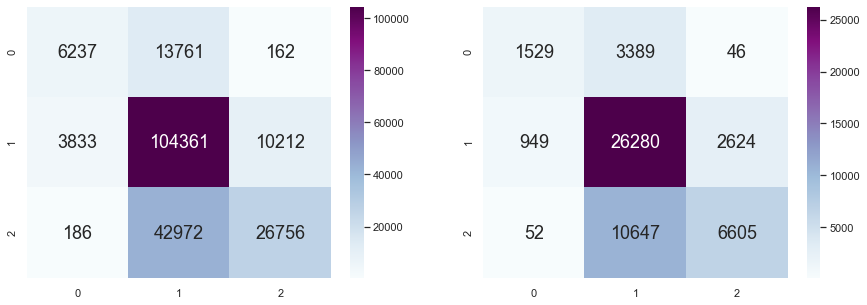

In [20]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit
print("Goodness of Fit of Decision Tree Model")
print("Classification Accuracy for Train Dataset \t:", dectree.score(x_train, y_train))
print("Classification Accuracy for Test Dataset \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
train_matrix = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
test_matrix = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Display the train and test matrix

In [21]:
train_matrix

array([[  6237,  13761,    162],
       [  3833, 104361,  10212],
       [   186,  42972,  26756]], dtype=int64)

In [22]:
test_matrix

array([[ 1529,  3389,    46],
       [  949, 26280,  2624],
       [   52, 10647,  6605]], dtype=int64)

## False Positive Rate and False Negative Rate of Train and Test 3x3 Matrix

In [23]:
print("Train Matrix")
FPR_Grade_1 = ((train_matrix[1][0])+(train_matrix[2][0]))/((train_matrix[1][0])+(train_matrix[2][0])+(train_matrix[0][0]))
print("False Positive Rate for Grade 1 is :",FPR_Grade_1)

FNR_Grade_1 = ((train_matrix[0][1])+(train_matrix[0][2]))/((train_matrix[0][1])+(train_matrix[0][2])+(train_matrix[1][1])+(train_matrix[1][2])+(train_matrix[2][1])+(train_matrix[2][2]))
print("False Negative Rate for Grade 1 is :",FNR_Grade_1)

print()

FPR_Grade_2 = ((train_matrix[0][1])+(train_matrix[2][1]))/((train_matrix[0][1])+(train_matrix[2][1])+(train_matrix[1][1]))
print("False Positive Rate for Grade 2 is :",FPR_Grade_2)

FNR_Grade_2 = ((train_matrix[1][0])+(train_matrix[1][2]))/((train_matrix[1][0])+(train_matrix[1][2])+(train_matrix[0][0])+(train_matrix[0][2])+(train_matrix[2][0])+(train_matrix[2][2]))
print("False Negative Rate for Grade 2 is :",FNR_Grade_2)

print()

FPR_Grade_3 = ((train_matrix[0][2])+(train_matrix[1][2]))/((train_matrix[0][2])+(train_matrix[1][2])+(train_matrix[2][2]))
print("False Positive Rate for Grade 3 is :",FPR_Grade_3)

FNR_Grade_3 = ((train_matrix[2][0])+(train_matrix[2][1]))/((train_matrix[2][0])+(train_matrix[2][1])+(train_matrix[0][0])+(train_matrix[0][1])+(train_matrix[1][0])+(train_matrix[1][1]))
print("False Negative Rate for Grade 3 is :",FNR_Grade_3)

print()
print()

print("Test Matrix")
FPR_Grade_1 = ((test_matrix[1][0])+(test_matrix[2][0]))/((test_matrix[1][0])+(test_matrix[2][0])+(test_matrix[0][0]))
print("False Positive Rate for Grade 1 is :",FPR_Grade_1)

FNR_Grade_1 = ((test_matrix[0][1])+(test_matrix[0][2]))/((test_matrix[0][1])+(test_matrix[0][2])+(test_matrix[1][1])+(test_matrix[1][2])+(test_matrix[2][1])+(test_matrix[2][2]))
print("False Negative Rate for Grade 1 is :",FNR_Grade_1)

print()

FPR_Grade_2 = ((test_matrix[0][1])+(test_matrix[2][1]))/((test_matrix[0][1])+(test_matrix[2][1])+(test_matrix[1][1]))
print("False Positive Rate for Grade 2 is :",FPR_Grade_2)

FNR_Grade_2 = ((test_matrix[1][0])+(test_matrix[1][2]))/((test_matrix[1][0])+(test_matrix[1][2])+(test_matrix[0][0])+(test_matrix[0][2])+(test_matrix[2][0])+(test_matrix[2][2]))
print("False Negative Rate for Grade 2 is :",FNR_Grade_2)

print()

FPR_Grade_3 = ((test_matrix[0][2])+(test_matrix[1][2]))/((test_matrix[0][2])+(test_matrix[1][2])+(test_matrix[2][2]))
print("False Positive Rate for Grade 3 is :",FPR_Grade_3)

FNR_Grade_3 = ((test_matrix[2][0])+(test_matrix[2][1]))/((test_matrix[2][0])+(test_matrix[2][1])+(test_matrix[0][0])+(test_matrix[0][1])+(test_matrix[1][0])+(test_matrix[1][1]))
print("False Negative Rate for Grade 3 is :",FNR_Grade_3)


Train Matrix
False Positive Rate for Grade 1 is : 0.3918681747269891
False Negative Rate for Grade 1 is : 0.07023871983210912

False Positive Rate for Grade 2 is : 0.3521732652985214
False Negative Rate for Grade 2 is : 0.2963955598700038

False Positive Rate for Grade 3 is : 0.27939671424723944
False Negative Rate for Grade 3 is : 0.25187044061861685


Test Matrix
False Positive Rate for Grade 1 is : 0.39565217391304347
False Negative Rate for Grade 1 is : 0.069266600794499

False Positive Rate for Grade 2 is : 0.3481496180176605
False Negative Rate for Grade 2 is : 0.30266836086404064

False Positive Rate for Grade 3 is : 0.28787061994609164
False Negative Rate for Grade 3 is : 0.2497082574802782


## Listing down the gini importance of each feature from Decision Tree Classifier in descending order

In [24]:
dectree_importance_data = pd.DataFrame(data=dectree.feature_importances_,index = x_train.columns,
                   columns=['importance']).sort_values('importance',ascending=False)
dectree_importance_data

,importance
geo_level_1_id,0.665335
has_superstructure_mud_mortar_stone,0.142178
age,0.091537
foundation_type,0.032674
geo_level_2_id,0.026421
has_superstructure_stone_flag,0.011554
roof_type,0.011422
has_superstructure_cement_mortar_brick,0.003104
has_superstructure_mud_mortar_brick,0.002913
has_secondary_use,0.002245


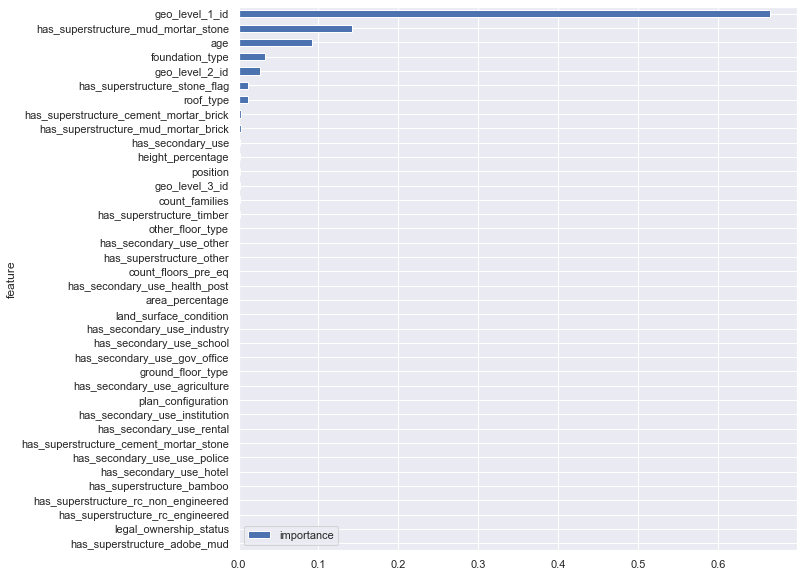

In [25]:
dectree_fi = pd.DataFrame({'importance':dectree.feature_importances_})    
dectree_fi['feature'] = x_train.columns
dectree_fi.sort_values(by='importance', inplace=True)
dectree_fi.plot(kind='barh', x='feature', y='importance',figsize=(10, 10))

## Select the most important features of Decision Tree Classifier

In [26]:
# Create a selector object to identify and select features that have an importance of more than 0.0001 
from sklearn.feature_selection import SelectFromModel

dectree_sfm = SelectFromModel(dectree, threshold=0.0001)
dectree_sfm.fit(x_train, y_train.values.ravel())

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None,
                                                 criterion='gini', max_depth=6,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort=False,
                                                 random_state=None,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False,
                threshold=0.0001)

## List down the selected importance features of Decision Tree Classifier

In [27]:
# Print the names of the selected most important features
for index in dectree_sfm.get_support(indices=True):
    print(x_train.columns[index])

print()
print('Total number of selected importance features:', len(dectree_sfm.get_support(indices=True)))

geo_level_1_id
geo_level_2_id
geo_level_3_id
age
height_percentage
foundation_type
roof_type
other_floor_type
position
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_other
count_families
has_secondary_use
has_secondary_use_other

Total number of selected importance features: 18


## Create the importance features of train and test dataset

In [28]:
x_dectree_importance_train = dectree_sfm.transform(x_train)
x_dectree_importance_test = dectree_sfm.transform(x_test)

## Run a new Decision Tree Classifier containing most importance features

In [29]:
dectree_importance = DecisionTreeClassifier(max_depth = 6)
dectree_importance.fit(x_dectree_importance_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Confusion Matrix and Classification Accuracy of the Decision Tree Classifer (Importance features)

Goodness of Fit of Decision Tree Model (Importance Features)
Classification Accuracy of Train Dataset: 0.6588353798925557
Classification Accuracy of Test Dataset: 0.6602712918017689



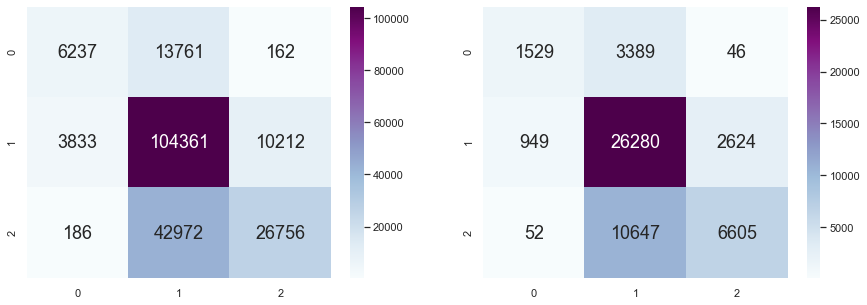

In [31]:
dectree_importance_train_pred = dectree_importance.predict(x_dectree_importance_train)
dectree_importance_test_pred = dectree_importance.predict(x_dectree_importance_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Decision Tree Model (Importance Features)")
print("Classification Accuracy of Train Dataset:", dectree_importance.score(x_dectree_importance_train, y_train))
print("Classification Accuracy of Test Dataset:", dectree_importance.score(x_dectree_importance_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
dectree_importance_train_matrix = confusion_matrix(y_train, dectree_importance_train_pred)
sb.heatmap(dectree_importance_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
dectree_importance_test_matrix = confusion_matrix(y_test, dectree_importance_test_pred)
sb.heatmap(dectree_importance_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Comparing Decision Tree Classifier with and without Importance Features

In [32]:
print("Goodness of Fit of Decision Tree Model")
print("Classification Accuracy for Train Dataset \t:", dectree.score(x_train, y_train))
print("Classification Accuracy for Test Dataset \t:", dectree.score(x_test, y_test))
print('Number of columns been used:', (len(x_train.columns)))
class_acc_dectree_test = dectree.score(x_test, y_test)

print()

print("Goodness of Fit of Decision Tree Model (Importance Features)")
print("Classification Accuracy of Train Dataset \t:", dectree_importance.score(x_dectree_importance_train, y_train))
print("Classification Accuracy of Test Dataset \t:", dectree_importance.score(x_dectree_importance_test, y_test))
print('Number of columns been used for importance features:', len(dectree_sfm.get_support(indices=True)))
class_acc_dectree_test_fi = dectree_importance.score(x_dectree_importance_test, y_test)

Goodness of Fit of Decision Tree Model
Classification Accuracy for Train Dataset 	: 0.6588353798925557
Classification Accuracy for Test Dataset 	: 0.6602712918017689
Number of columns been used: 38

Goodness of Fit of Decision Tree Model (Importance Features)
Classification Accuracy of Train Dataset 	: 0.6588353798925557
Classification Accuracy of Test Dataset 	: 0.6602712918017689
Number of columns been used for importance features: 18


## Observation: By using Decision Tree Classifier with Importance Features, we manage to use lesser predictors and still manage to get the same classification accuracy for train and test dataset.

## Comparing the Memory Usage of Importance Features with the Original Dataset

In [33]:
dectree_train_fi = [] 
for index in dectree_sfm.get_support(indices=True):
    dectree_train_fi.append(x_train.columns[index]) 

dectree_train_fi_ms = pd.DataFrame(trainData[dectree_train_fi])

print('Memory usage for original dataset:', x_train.memory_usage(deep = 'true').sum())
print('Memory usage for importance features dataset:', dectree_train_fi_ms.memory_usage(deep = 'true').sum())

memory_usage = x_train.memory_usage(deep = 'true').sum() - dectree_train_fi_ms.memory_usage(deep = 'true').sum()
print('The difference of the memory usage:',memory_usage, 'bytes')

Memory usage for original dataset: 53370880
Memory usage for importance features dataset: 42800284
The difference of the memory usage: 10570596 bytes


## Observation: Hence, by selecting only the most importance features, we can observe that lesser columns were been used and this helps to decrease of memory usage. 

## We will be using Random Forest and Cat Boost Models to compare with Decision Tree Model to observe which one has the highest classification accuracy. All the models will be using the same dataset as Decision Tree Model

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Parameters for the RandomForestClassifier
#n_estimators = represents the number of the trees in the forest
#n_jobs = -1 is to use up all the CPUs to run faster
#min_samples_leaf: The minimum number of samples required to be at a leaf node

rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, min_samples_leaf = 5)
rf.fit(x_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## Confusion Matrix and Classification Accuracy of Random Forest Classifier

Goodness of Fit of Random Forest Model
Classification Accuracy of train dataset: 0.7831350729086723
Classification Accuracy of test dataset: 0.7221465436196542


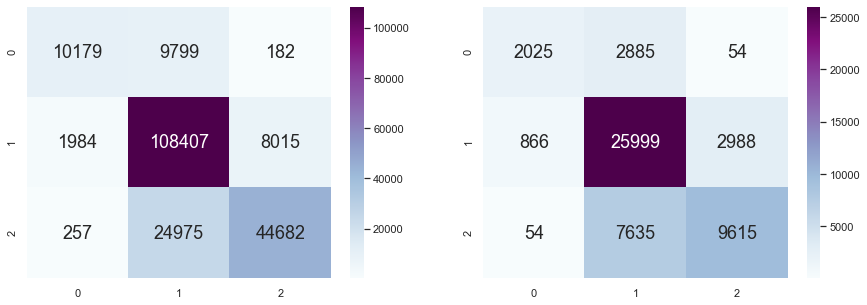

In [35]:
# Predict the Response corresponding to Predictors
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

# Print the Classification Accuracy
print("Goodness of Fit of Random Forest Model")
print("Classification Accuracy of train dataset:", rf.score(x_train, y_train))
print("Classification Accuracy of test dataset:", rf.score(x_test, y_test))

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
rf_train_matrix = confusion_matrix(y_train, rf_train_pred)
sb.heatmap(rf_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
rf_test_matrix = confusion_matrix(y_test, rf_test_pred)
sb.heatmap(rf_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Listing down the gini importance of each feature from Random Forest Classifier in descending order

In [36]:
rf_fi = pd.DataFrame(data=rf.feature_importances_,index = x_train.columns,
                   columns=['importance']).sort_values('importance',ascending=False)
rf_fi

,importance
geo_level_1_id,0.267724
geo_level_2_id,0.130046
geo_level_3_id,0.102075
age,0.063713
area_percentage,0.056705
height_percentage,0.042134
has_superstructure_mud_mortar_stone,0.040477
foundation_type,0.040397
roof_type,0.033131
ground_floor_type,0.028327


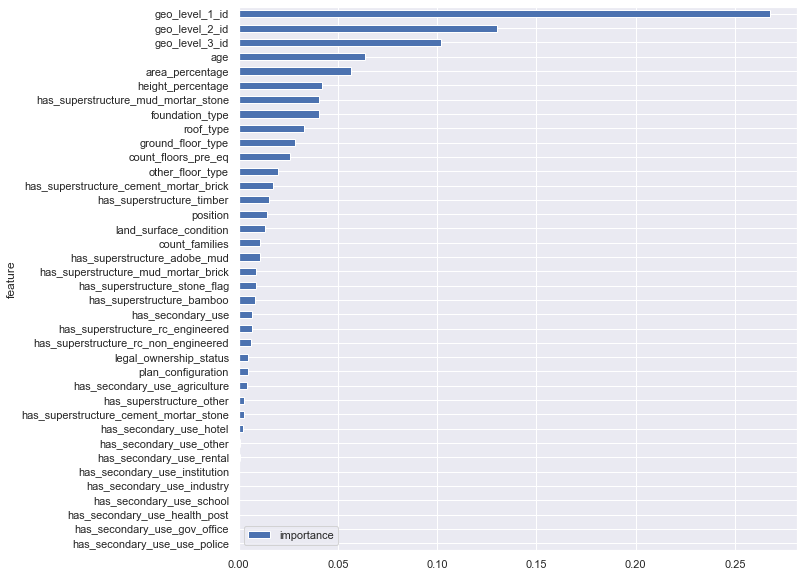

In [37]:
rf_fi = pd.DataFrame({'importance':rf.feature_importances_})    
rf_fi['feature'] = x_train.columns
rf_fi.sort_values(by='importance', inplace=True)
rf_fi.plot(kind='barh', x='feature', y='importance',figsize=(10, 10))

 ## Identify and select the most important features of Random Forest Classifier

In [38]:
# Create a selector object to identify and select features that have an importance of more than 0.01 
rf_sfm_fi = SelectFromModel(rf, threshold=0.01) 
rf_sfm_fi.fit(x_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=5,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
    

## List down the selected importance features of Random Forest Classifier

In [39]:
# Print the names of the most important features
for index in rf_sfm_fi.get_support(indices=True):
    print(x_train.columns[index])
    
print()
print('Total number of columns will be using for importance features:', len(rf_sfm_fi.get_support(indices=True)))

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_cement_mortar_brick
has_superstructure_timber
count_families

Total number of columns will be using for importance features: 18


## Create importance features of train and test dataset

In [40]:
x_important_train = rf_sfm_fi.transform(x_train)
x_important_test = rf_sfm_fi.transform(x_test)

## Run a new random forest classifier containing the most importance features

In [41]:
rf_importance = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf = 5)
rf_importance.fit(x_important_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## Confusion Matrix and Classification Accuracy of the Random Forest Classifer (Importance features)

Goodness of Fit of Random Forest Model (Importance Features)
Classification Accuracy of Train Dataset: 0.804657521105142
Classification Accuracy of Test Dataset: 0.7276721475029259



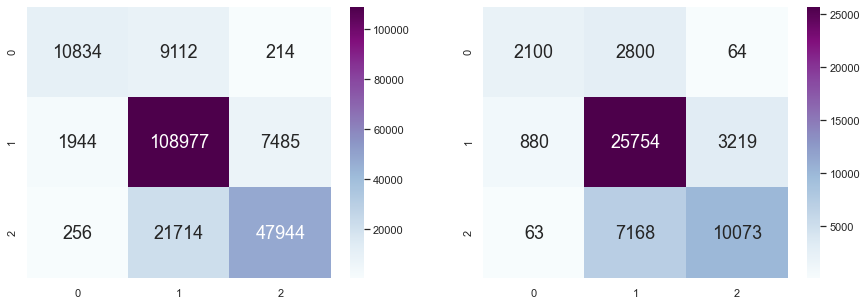

In [42]:
rf_importance_train_pred = rf_importance.predict(x_important_train)
rf_importance_test_pred = rf_importance.predict(x_important_test)

# Check the Goodness of Fit
print("Goodness of Fit of Random Forest Model (Importance Features)")
print("Classification Accuracy of Train Dataset:", rf_importance.score(x_important_train, y_train))
print("Classification Accuracy of Test Dataset:", rf_importance.score(x_important_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
rf_importance_train_matrix = confusion_matrix(y_train, rf_importance_train_pred)
sb.heatmap(rf_importance_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
rf_importance_test_matrix = confusion_matrix(y_test, rf_importance_test_pred)
sb.heatmap(rf_importance_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Comparing Random Forest Classifier with and without Importance Features

In [43]:
print("Goodness of Fit of Random Forest Model")
print("Classification Accuracy of train dataset:", rf.score(x_train, y_train))
print("Classification Accuracy of test dataset:", rf.score(x_test, y_test))
print('Number of columns been used:', (len(x_train.columns)))
class_acc_rf_test = rf.score(x_test, y_test)

print()

print("Goodness of Fit of Random Forest Model (Importance Features)")
print("Classification Accuracy of Train Dataset:", rf_importance.score(x_important_train, y_train))
print("Classification Accuracy of Test Dataset:", rf_importance.score(x_important_test, y_test))
print('Number of columns been used for importance features:', len(rf_sfm_fi.get_support(indices=True)))
class_acc_rf_test_fi = rf_importance.score(x_important_test, y_test)

Goodness of Fit of Random Forest Model
Classification Accuracy of train dataset: 0.7831350729086723
Classification Accuracy of test dataset: 0.7221465436196542
Number of columns been used: 38

Goodness of Fit of Random Forest Model (Importance Features)
Classification Accuracy of Train Dataset: 0.804657521105142
Classification Accuracy of Test Dataset: 0.7276721475029259
Number of columns been used for importance features: 18


## Observation: By identifying and selected the importance features, we did improve the accuracy of the Random Forest Classifier. In additional, the number of predictors been used is much lesser and this will also help to reduce computational cost and time to train the model. 

## Cat Boost Classifier

In [44]:
from catboost import CatBoostClassifier

#Parameters
#Iterations: The number of trees to be built
#Verbose: output info of training process every 10 iterations
#Learning_rate = 1 : Used for reducing the gradient step

catboost = CatBoostClassifier(iterations = 100, verbose = 10, learning_rate = 1)

catboost.fit(x_train,y_train,       #data to train on
         eval_set=(x_test,y_test),  #data to validate on
         use_best_model = True,     #True if we don`t want to save trees created after iteration
         plot=True)                 #True for visulization of the training process

0:	learn: 0.8115649	test: 0.8078402	best: 0.8078402 (0)	total: 276ms	remaining: 27.3s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

10:	learn: 0.6908885	test: 0.6928234	best: 0.6928234 (10)	total: 2.55s	remaining: 20.7s
20:	learn: 0.6729454	test: 0.6781297	best: 0.6781297 (20)	total: 4.06s	remaining: 15.3s
30:	learn: 0.6581321	test: 0.6673765	best: 0.6673765 (30)	total: 5.42s	remaining: 12.1s
40:	learn: 0.6491028	test: 0.6621617	best: 0.6621617 (40)	total: 7.04s	remaining: 10.1s
50:	learn: 0.6407899	test: 0.6568426	best: 0.6568426 (50)	total: 8.58s	remaining: 8.24s
60:	learn: 0.6336596	test: 0.6535243	best: 0.6535243 (60)	total: 10.2s	remaining: 6.49s
70:	learn: 0.6261684	test: 0.6504457	best: 0.6504457 (70)	total: 12.1s	remaining: 4.92s
80:	learn: 0.6204183	test: 0.6468241	best: 0.6468241 (80)	total: 13.4s	remaining: 3.15s
90:	learn: 0.6157316	test: 0.6447022	best: 0.6447022 (90)	total: 14.7s	remaining: 1.46s
99:	learn: 0.6117469	test: 0.6425293	best: 0.6424419 (98)	total: 16s	remaining: 0us

bestTest = 0.6424418881
bestIteration = 98

Shrink model to first 99 iterations.


## Confusion Matrix and Classification Accuracy of Cat Boost Classifier

Goodness of Fit of Cat Boost Model
Classification Accuracy of Train Dataset: 0.7276813123561013
Classification Accuracy of Test Dataset: 0.7144145354079929



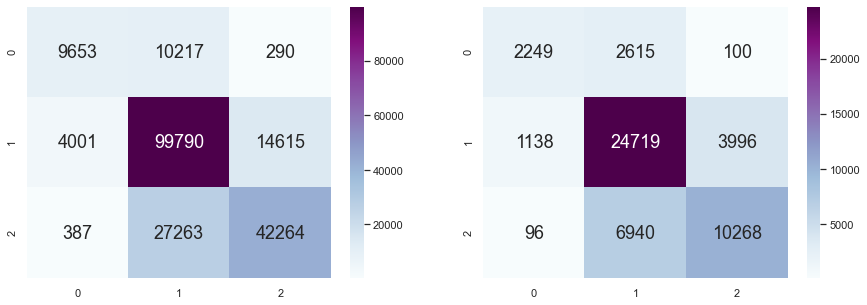

In [45]:
catboost_train_pred = catboost.predict(x_train)
catboost_test_pred = catboost.predict(x_test)

# Check the Goodness of Fit
print("Goodness of Fit of Cat Boost Model")
print("Classification Accuracy of Train Dataset:", catboost.score(x_train, y_train))
print("Classification Accuracy of Test Dataset:", catboost.score(x_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
catboost_train_matrix = confusion_matrix(y_train, catboost_train_pred)
sb.heatmap(catboost_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
catboost_test_matrix = confusion_matrix(y_test, catboost_test_pred)
sb.heatmap(catboost_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Listing down the gini importance of each feature from Cat Boost Classifier in descending order

In [46]:
catboost_fi=pd.DataFrame(data=catboost.feature_importances_,index=x_train.columns,
                   columns=['importance']).sort_values('importance',ascending=False)
catboost_fi

,importance
geo_level_1_id,44.873299
geo_level_2_id,13.871722
foundation_type,8.451005
geo_level_3_id,3.793145
age,3.646061
roof_type,3.435093
has_superstructure_cement_mortar_brick,2.727128
has_superstructure_mud_mortar_stone,2.671345
has_superstructure_timber,2.005583
count_floors_pre_eq,1.955118


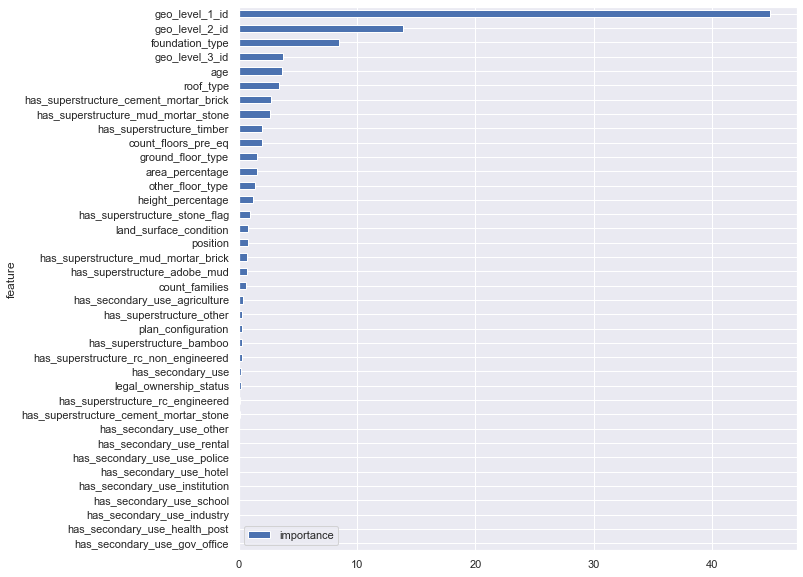

In [47]:
catboost_fi_data = pd.DataFrame({'importance':catboost.feature_importances_})    
catboost_fi_data['feature'] = x_train.columns
catboost_fi_data.sort_values(by='importance', inplace=True)
catboost_fi_data.plot(kind='barh', x='feature', y='importance',figsize=(10, 10))

## Select the most important features of Cat Boost Classifier

In [48]:
# Create a selector object to identify and select features that have an importance of more than 0.01 
catboost_sfm_fi = SelectFromModel(catboost, threshold=0.01)
catboost_sfm_fi.fit(x_train, y_train.values.ravel())

0:	learn: 0.8115649	total: 101ms	remaining: 10s
10:	learn: 0.6908885	total: 1.26s	remaining: 10.2s
20:	learn: 0.6729454	total: 2.44s	remaining: 9.19s
30:	learn: 0.6581321	total: 3.66s	remaining: 8.14s
40:	learn: 0.6491028	total: 4.92s	remaining: 7.09s
50:	learn: 0.6407899	total: 6.01s	remaining: 5.77s
60:	learn: 0.6336596	total: 7.1s	remaining: 4.54s
70:	learn: 0.6261684	total: 8.38s	remaining: 3.42s
80:	learn: 0.6204183	total: 9.64s	remaining: 2.26s
90:	learn: 0.6157316	total: 11.1s	remaining: 1.09s
99:	learn: 0.6117469	total: 12.3s	remaining: 0us


SelectFromModel(estimator=<catboost.core.CatBoostClassifier object at 0x000002CDBA52F080>,
                max_features=None, norm_order=1, prefit=False, threshold=0.01)

## List down the selected importance features of Cat Boost Classifier

In [49]:
# Print the names of the most important features
for index in catboost_sfm_fi.get_support(indices=True):
    print(x_train.columns[index])

print()
print('Total number of columns will be using for importance features:', len(catboost_sfm_fi.get_support(indices=True)))

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_cement_mortar_stone
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_bamboo
has_superstructure_rc_non_engineered
has_superstructure_rc_engineered
has_superstructure_other
legal_ownership_status
count_families
has_secondary_use
has_secondary_use_agriculture
has_secondary_use_hotel
has_secondary_use_rental
has_secondary_use_other

Total number of columns will be using for importance features: 32


## Create the importance features of train and test dataset

In [50]:
x_important_train = catboost_sfm_fi.transform(x_train)
x_important_test = catboost_sfm_fi.transform(x_test)

## Run a new Cat Boost Classifier containing the most importance features

In [51]:
catboost_fi = CatBoostClassifier(iterations = 100, verbose = 10, learning_rate = 1)

catboost_fi.fit(x_important_train,y_train,      
         eval_set=(x_important_test,y_test),  
         use_best_model = True,     
         plot=True)                 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8143422	test: 0.8104913	best: 0.8104913 (0)	total: 148ms	remaining: 14.6s
10:	learn: 0.6942162	test: 0.6959692	best: 0.6959692 (10)	total: 1.91s	remaining: 15.4s
20:	learn: 0.6722883	test: 0.6785539	best: 0.6785539 (20)	total: 3.39s	remaining: 12.8s
30:	learn: 0.6571643	test: 0.6675546	best: 0.6675546 (30)	total: 4.81s	remaining: 10.7s
40:	learn: 0.6482681	test: 0.6626748	best: 0.6626748 (40)	total: 6.13s	remaining: 8.83s
50:	learn: 0.6403930	test: 0.6579948	best: 0.6579948 (50)	total: 7.44s	remaining: 7.15s
60:	learn: 0.6322680	test: 0.6521674	best: 0.6521674 (60)	total: 8.78s	remaining: 5.61s
70:	learn: 0.6267003	test: 0.6490895	best: 0.6490250 (69)	total: 10.2s	remaining: 4.16s
80:	learn: 0.6219002	test: 0.6465504	best: 0.6465504 (80)	total: 11.4s	remaining: 2.68s
90:	learn: 0.6159922	test: 0.6436360	best: 0.6436360 (90)	total: 12.8s	remaining: 1.26s
99:	learn: 0.6117211	test: 0.6417935	best: 0.6417935 (99)	total: 14s	remaining: 0us

bestTest = 0.6417934701
bestIteration

## Confusion Matrix and Classification Accuracy of the Cat Boost Classifer (Importance features)

Goodness of Fit of Cat Boost Model (Importance Features)
Cat Boost Classification Accuracy of Train Dataset: 0.7279595165003837
Cat Boost Classification Accuracy of Test Dataset: 0.7143953492833982



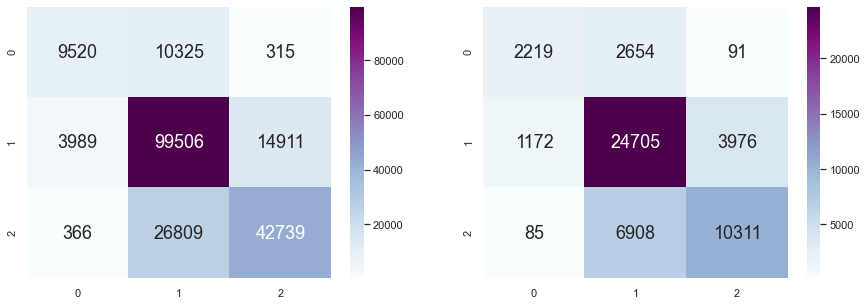

In [52]:
catboost_fi_train_pred = catboost_fi.predict(x_important_train)
catboost_fi_test_pred = catboost_fi.predict(x_important_test)

# Check the Goodness of Fit
print("Goodness of Fit of Cat Boost Model (Importance Features)")
print("Cat Boost Classification Accuracy of Train Dataset:", catboost_fi.score(x_important_train, y_train))
print("Cat Boost Classification Accuracy of Test Dataset:", catboost_fi.score(x_important_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
catboost_fi_train_matrix = confusion_matrix(y_train, catboost_fi_train_pred)
sb.heatmap(catboost_fi_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
catboost_fi_test_matrix = confusion_matrix(y_test, catboost_fi_test_pred)
sb.heatmap(catboost_fi_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Comparing Cat Boost Classifier with and without Importance Features

In [53]:
# Check the Goodness of Fit
print("Goodness of Fit of Cat Boost Model")
print("Classification Accuracy of Train Dataset:", catboost.score(x_train, y_train))
print("Classification Accuracy of Test Dataset:", catboost.score(x_test, y_test))
print('Number of columns been used:', (len(x_train.columns)))
class_acc_catboost_test =  catboost.score(x_test, y_test)
print()

print("Goodness of Fit of Cat Boost Model (Importance Features)")
print("Cat Boost Classification Accuracy of Train Dataset:", catboost_fi.score(x_important_train, y_train))
print("Cat Boost Classification Accuracy of Test Dataset:", catboost_fi.score(x_important_test, y_test))
print('Number of columns been used for importance features:', len(catboost_sfm_fi.get_support(indices=True)))
class_acc_catboost_test_fi = catboost_fi.score(x_important_test, y_test)
print()

Goodness of Fit of Cat Boost Model
Classification Accuracy of Train Dataset: 0.7276813123561013
Classification Accuracy of Test Dataset: 0.7144145354079929
Number of columns been used: 38

Goodness of Fit of Cat Boost Model (Importance Features)
Cat Boost Classification Accuracy of Train Dataset: 0.7279595165003837
Cat Boost Classification Accuracy of Test Dataset: 0.7143953492833982
Number of columns been used for importance features: 32



## Observation: We can observe that the difference of using Cat Boost Classifier with and without Importance features. By identifying and select the importance features, we did improve the accuracy of the Cat Boost Classifier. In additional, the number of predictors been used is much lesser and this will also help to reduce computational cost and time to train the model

## Comparing all of the Models Classification Accuracy of Test Dataset

In [54]:
print("Goodness of Fit of Decision Tree Model")
print("Classification Accuracy for Test Dataset \t:", class_acc_dectree_test)
print()

print("Goodness of Fit of Decision Tree Model (Importance Features)")
print("Classification Accuracy of Test Dataset \t:", class_acc_dectree_test_fi)
print()

print("Goodness of Fit of Random Forest Model")
print("Classification Accuracy of test dataset \t:", class_acc_rf_test)
print()

print("Goodness of Fit of Random Forest Model (Importance Features)")
print("Classification Accuracy of Test Dataset \t:", class_acc_rf_test_fi)
print()

print("Goodness of Fit of Cat Boost Model")
print("Classification Accuracy of Test Dataset \t:", class_acc_catboost_test)
print()

print("Goodness of Fit of Cat Boost Model (Importance Features)")
print("Classification Accuracy of Test Dataset \t:", class_acc_catboost_test_fi)


Goodness of Fit of Decision Tree Model
Classification Accuracy for Test Dataset 	: 0.6602712918017689

Goodness of Fit of Decision Tree Model (Importance Features)
Classification Accuracy of Test Dataset 	: 0.6602712918017689

Goodness of Fit of Random Forest Model
Classification Accuracy of test dataset 	: 0.7221465436196542

Goodness of Fit of Random Forest Model (Importance Features)
Classification Accuracy of Test Dataset 	: 0.7276721475029259

Goodness of Fit of Cat Boost Model
Classification Accuracy of Test Dataset 	: 0.7144145354079929

Goodness of Fit of Cat Boost Model (Importance Features)
Classification Accuracy of Test Dataset 	: 0.7143953492833982


## Observation: Based on the comparison of all the model classification accuracy on test dataset, we can see that the random forest classifier containing only the most importance features has the best accuracy among other models to predict the damage grade for the buildings.

In [55]:
testDamage = pd.read_csv('submission_format.csv')
testDamage.drop(['damage_grade'], axis=1, inplace=True)
testDamage.head()

,building_id
0,300051
1,99355
2,890251
3,745817
4,421793


## Create a new dataset with only selection of Random Forest Importance Features columns

In [56]:
rf_sfm_fi_testdata = [] 
for index in rf_sfm_fi.get_support(indices=True):
    rf_sfm_fi_testdata.append(x_train.columns[index]) 

testData_pred = pd.DataFrame(testData[rf_sfm_fi_testdata])
testData_pred

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families
0,17,596,11307,3,20,7,6,2,2,0,0,1,2,0,1,0,0,1
1,6,141,11987,2,25,13,5,2,2,0,0,1,2,0,1,0,0,1
2,22,19,10044,2,5,4,5,2,2,0,0,1,2,0,1,0,0,1
3,26,39,633,1,0,19,3,2,2,2,2,0,3,0,0,1,0,2
4,17,289,7970,3,15,8,7,2,2,1,0,1,3,0,1,0,0,1
5,22,170,4029,1,55,4,3,2,2,1,0,0,2,0,1,0,0,1
6,26,432,6794,2,0,6,7,0,2,0,2,3,2,0,0,1,0,1
7,8,1373,958,2,35,2,8,2,2,0,0,1,2,0,1,0,0,0
8,16,244,3521,2,30,6,5,2,2,0,0,3,2,0,1,0,0,1
9,26,761,3137,2,5,6,7,0,2,0,0,3,2,0,1,0,1,1


## Predict the damage grade on the Dataset

In [57]:
rf_pred_test=rf_importance.predict(testData_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(rf_pred_test, columns = ["damage_grade"], index = testData_pred.index)
prediction = pd.concat([testDamage['building_id'],y_pred], axis = 1)
prediction.head(10)

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
5,871976,2
6,691228,1
7,896100,3
8,343471,2
9,766647,2


## Probability of the damage grade for each buildings

In [58]:
y_prob = rf.predict_proba(testData)
np.set_printoptions(suppress=True, precision = 3)
y_prob

array([[0.001, 0.281, 0.718],
       [0.012, 0.694, 0.294],
       [0.11 , 0.687, 0.203],
       ...,
       [0.066, 0.683, 0.25 ],
       [0.015, 0.684, 0.301],
       [0.436, 0.533, 0.031]])

## Displaying the prediction damage grade % in pie chart

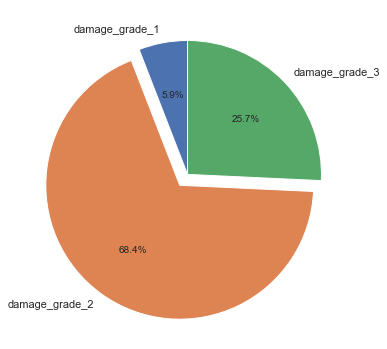

In [59]:
# Pie chart
prediction_grade_df = prediction.copy()
prediction_grade_1_count = len(prediction_grade_df[prediction_grade_df['damage_grade'] == 1].index)
prediction_grade_2_count = len(prediction_grade_df[prediction_grade_df['damage_grade'] == 2].index)
prediction_grade_3_count = len(prediction_grade_df[prediction_grade_df['damage_grade'] == 3].index)

labels = ['damage_grade_1', 'damage_grade_2', 'damage_grade_3']
sizes = [prediction_grade_1_count, prediction_grade_2_count, prediction_grade_3_count]
fig1, ax1 = plt.subplots(figsize=(6, 7))
explode = (0, 0.1, 0)  
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90) 
plt.show()